In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# dataset example
data = {
    'Возраст': [22, 28, 35, 19, 30, 25, 31, 20, 40, 27, 23, 38, 29, 26, 33, 21, 39, 28, 24, 36, 25, 32, 22, 37, 29],
    'Время в играх': [1.67433, 2.85995, 3.52061, 1.18727, 2.9667, 2.30056, 3.15212, 1.60036, 4.22803, 2.26029, 1.703, 3.89607, 2.73117, 2.47904, 3.46597, 1.616, 4.05818, 2.91622, 1.77904, 3.80593, 2.30809, 3.38738, 1.57801, 3.69475, 2.84091],
    'Расходы на игры': [58, 91, 123, 47, 102, 88, 114, 43, 145, 92, 65, 142, 104, 94, 132, 53, 148, 91, 61, 137, 67, 111, 50, 133, 103]
}

df = pd.DataFrame(data)

X = df.values
X[:5]

array([[ 22.     ,   1.67433,  58.     ],
       [ 28.     ,   2.85995,  91.     ],
       [ 35.     ,   3.52061, 123.     ],
       [ 19.     ,   1.18727,  47.     ],
       [ 30.     ,   2.9667 , 102.     ]])

In [2]:
# Centering data
scaler = StandardScaler()

X_centered = scaler.fit_transform(X)

In [3]:
cov_matrix = np.cov(X_centered.T)
cov_matrix

array([[1.04166667, 1.02495178, 1.01833879],
       [1.02495178, 1.04166667, 1.01660152],
       [1.01833879, 1.01660152, 1.04166667]])

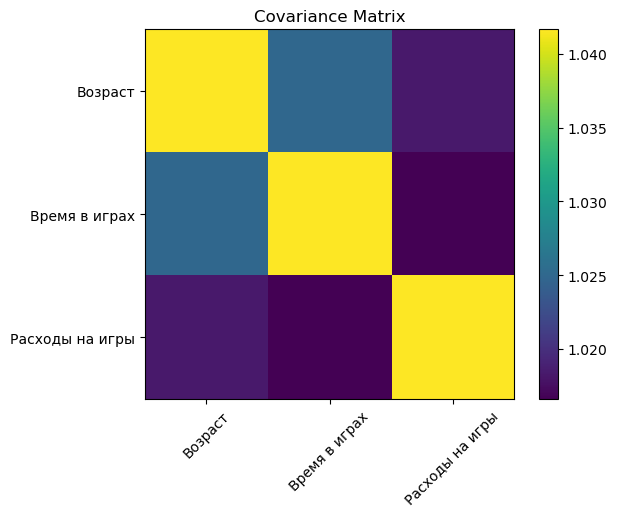

In [4]:
plt.imshow(cov_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Covariance Matrix")
plt.show()

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
idx

array([0, 2, 1])

In [6]:
eigenvectors = eigenvectors[:,idx]
eigenvectors

array([[-0.57798452, -0.33545571, -0.74391086],
       [-0.57765779, -0.4757148 ,  0.66333016],
       [-0.57640729,  0.81312047,  0.08117718]])

In [7]:
eigenvalues = eigenvalues[idx]
eigenvalues

array([3.08159896, 0.02678636, 0.01661467])

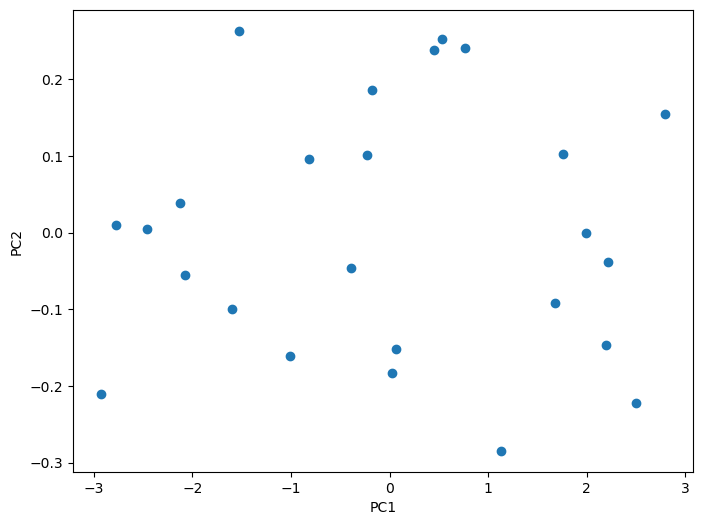

Explained variance ratio for every component = [0.98611167 0.00857164 0.0053167 ]
Cumulative ratio = [0.98611167 0.9946833  1.        ]


In [8]:
# chosing number of main components
k = 2
W = eigenvectors[:, :k]

# projecting the data 
X_projected = X_centered.dot(W)

# Visualization 
plt.figure(figsize=(8,6))
plt.scatter(X_projected[:,0], X_projected[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# explained variance
explained_variance_ratio = eigenvalues/sum(eigenvalues)
print(f"Explained variance ratio for every component = {explained_variance_ratio}")
print(f"Cumulative ratio = {np.cumsum(explained_variance_ratio)}")

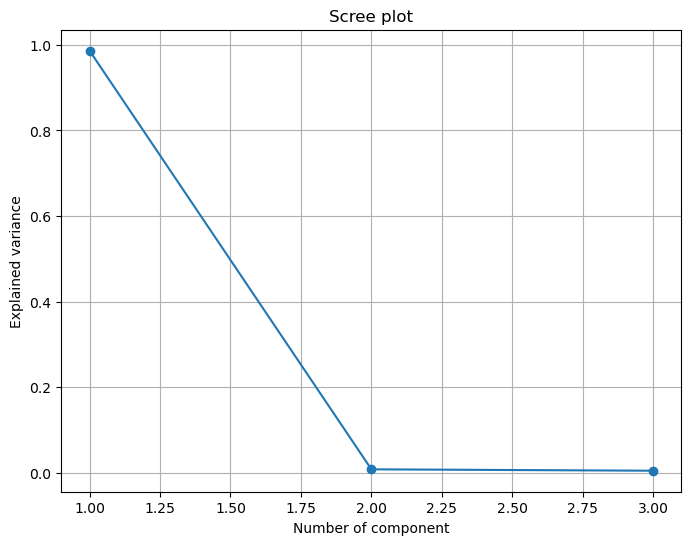

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 1+len(explained_variance_ratio)), explained_variance_ratio, marker="o")
plt.title("Scree plot")
plt.xlabel("Number of component")
plt.ylabel("Explained variance")
plt.grid(True)
plt.show()

In [14]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.98611167, 0.9946833 , 1.        ])

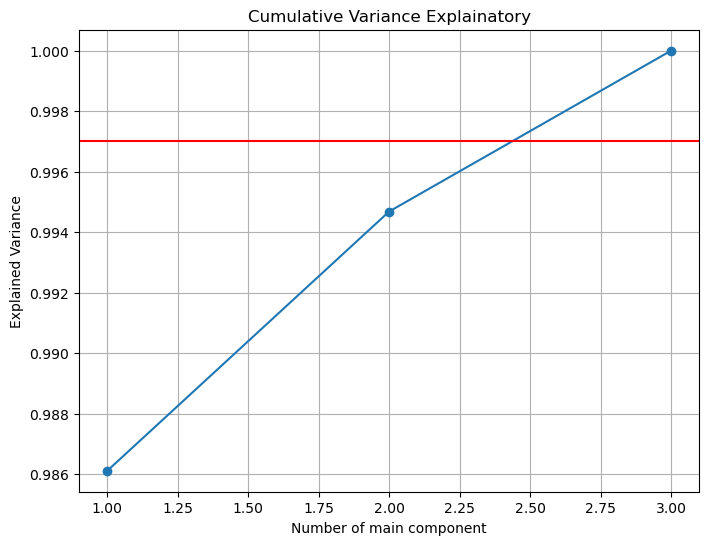

In [23]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance_ratio)+1), cumulative_variance_ratio, marker="o")
plt.title("Cumulative Variance Explainatory")
plt.xlabel("Number of main component")
plt.ylabel("Explained Variance")
plt.grid(True)


plt.axhline(y=0.997, color="r", linestyle="-")

plt.show()

In [24]:
pca_components = pd.DataFrame(
    W,
    columns=["PC1","PC2"],
    index=["Возраст", "Время в играх", "Расходы на игры"]
)

pca_components

,PC1,PC2
Возраст,-0.577985,-0.335456
Время в играх,-0.577658,-0.475715
Расходы на игры,-0.576407,0.813120
